Name: **Pranit Zanwar**<br>
Div: **BE09-SE091**<br>
Roll no: **43181**<br>
Title: **Assignment 2: Implementing Feedforward neural networks with Keras and TensorFlow**<br>

In [1]:
#installations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [3]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [4]:
#building the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [5]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 2.2820 - accuracy: 0.1831 - val_loss: 2.2548 - val_accuracy: 0.2155
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2311 - accuracy: 0.3242 - val_loss: 2.2006 - val_accuracy: 0.3762
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 2.1686 - accuracy: 0.4317 - val_loss: 2.1260 - val_accuracy: 0.5122
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 2.0800 - accuracy: 0.5200 - val_loss: 2.0177 - val_accuracy: 0.5450
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 1.9545 - accuracy: 0.5545 - val_loss: 1.8703 - val_accuracy: 0.5913
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 1.7929 - accuracy: 0.5929 - val_loss: 1.6925 - val_accuracy: 0.6069
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 1.6125 - accuracy: 0.6277 - val_loss: 1.5093 - val_accuracy: 0.6362
Epoch 

In [6]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       980
           1       0.76      0.97      0.85      1135
           2       0.76      0.65      0.70      1032
           3       0.65      0.86      0.74      1010
           4       0.69      0.75      0.72       982
           5       0.85      0.25      0.39       892
           6       0.76      0.87      0.81       958
           7       0.76      0.85      0.80      1028
           8       0.79      0.61      0.69       974
           9       0.65      0.52      0.58      1009

    accuracy                           0.74     10000
   macro avg       0.74      0.73      0.71     10000
weighted avg       0.74      0.74      0.72     10000



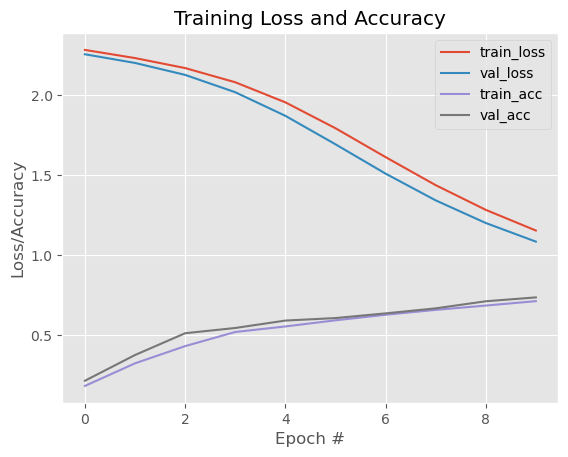

In [7]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()